In [110]:
from IPython.display import Image
from IPython.core.display import HTML 


In [111]:
%matplotlib inline

In [112]:
import os

import re
import itertools as it
import numpy as np
from razdel import sentenize
from razdel import tokenize
# import pymorphy2
# morph = pymorphy2.MorphAnalyzer()

In [113]:
from nltk.tokenize.toktok import ToktokTokenizer
toktok = ToktokTokenizer()

In [114]:
from collections import Counter, defaultdict

In [115]:
import pickle

In [116]:
#data_path = r'C:\Users\Вячеслав\Documents\Python\ML\2 семестр\LECs\lec4'
# filenames = {r'OpenSubtitles.ru-uk.ru': 'ru', 'OpenSubtitles.ru-uk.uk': 'uk'}
# очень долго!!!
filenames = {r'OpenSubtitles.mk-ru.mk': 'mk', r'OpenSubtitles.mk-ru.ru': 'ru', 'OpenSubtitles.en-ru.en':'en'}

In [117]:
#pickle.dump(file_word_counters, open(os.path.join(data_path, 'os_mk_ru_en.pickle'), 'wb'))

In [118]:
file_word_counters = pickle.load(open(os.path.join('os_mk_ru_en.pickle'), 'rb'))

In [119]:
file_word_counters

{'OpenSubtitles.mk-ru.mk': Counter({'секоја': 2449,
          'епоха': 4,
          'сонува': 64,
          'за': 143056,
          'свој': 560,
          'наследник': 167,
          'во': 163376,
          'овој': 10400,
          'момент': 2742,
          'ние': 14874,
          'како': 72715,
          'нација': 168,
          'ќе': 168834,
          'ги': 65771,
          'достигнеме': 12,
          'ѕвездите': 235,
          'треперам': 11,
          'од': 103893,
          'честа': 213,
          'да': 463682,
          'ја': 85029,
          'објавам': 66,
          'кулминацијата': 4,
          'на': 208677,
          'човечката': 177,
          'долга': 388,
          'историја': 506,
          'интелектуално': 8,
          'и': 188506,
          'научно': 56,
          'достигнување': 36,
          'вчера': 1282,
          'нашата': 3640,
          'моќ': 1079,
          'завладеа': 8,
          'со': 99340,
          'а': 38297,
          'денес': 4107,
          'осветли': 

In [120]:
# Обзор данных:
v = file_word_counters['OpenSubtitles.mk-ru.ru'] 
# k, v
cl = Counter(len(w) for w in v)
cl.most_common()

[(8, 44050),
 (7, 43877),
 (9, 38939),
 (6, 34880),
 (10, 31268),
 (5, 23515),
 (11, 22513),
 (12, 14891),
 (4, 11179),
 (13, 9450),
 (14, 5801),
 (3, 4063),
 (15, 3198),
 (16, 1866),
 (17, 1020),
 (2, 798),
 (18, 572),
 (19, 285),
 (20, 143),
 (21, 96),
 (1, 69),
 (22, 49),
 (23, 34),
 (24, 26),
 (25, 25),
 (26, 19),
 (28, 16),
 (27, 11),
 (31, 11),
 (30, 9),
 (29, 8),
 (33, 6),
 (32, 5),
 (35, 4),
 (37, 3),
 (34, 3),
 (38, 2),
 (43, 1),
 (52, 1),
 (40, 1),
 (39, 1)]

In [121]:
[w for w in v if 2 > len(w) > 0]

['о',
 'в',
 'я',
 'и',
 'с',
 'а',
 'ж',
 'к',
 'у',
 'ы',
 'д',
 'б',
 'i',
 'э',
 'л',
 'е',
 'р',
 'c',
 'ц',
 'g',
 'ч',
 'н',
 'й',
 'a',
 'м',
 'т',
 'ь',
 'o',
 'п',
 'ф',
 'г',
 'p',
 'd',
 'b',
 'ј',
 'ќ',
 'џ',
 'з',
 'ѕ',
 'ю',
 'u',
 's',
 'e',
 'х',
 'à',
 'y',
 'l',
 'm',
 't',
 'ў',
 'x',
 'w',
 'z',
 'ё',
 'f',
 'j',
 'r',
 'k',
 'n',
 'h',
 'ш',
 'ƒ',
 'v',
 'ћ',
 'є',
 'ђ',
 'q',
 'ї',
 'ъ']

In [122]:
v['f']

10

In [123]:
for fn, wc in file_word_counters.items():
    print(f'file: {fn} len: {len(wc)}')

file: OpenSubtitles.mk-ru.mk len: 192659
file: OpenSubtitles.mk-ru.ru len: 292708
file: OpenSubtitles.en-ru.en len: 361005


In [124]:
c3 = Counter('aabbbbcdef')
c5 = Counter(c3)
c3, c5

(Counter({'a': 2, 'b': 4, 'c': 1, 'd': 1, 'e': 1, 'f': 1}),
 Counter({'a': 2, 'b': 4, 'c': 1, 'd': 1, 'e': 1, 'f': 1}))

In [125]:
def lang_dicts_filter(lang_dicts, f_exclude=lambda w, cnt, lng: False, f_action=lambda w, cnt, lng: None, new_counters=False):
    if new_counters:
        result = {}
    else:
        result = lang_dicts
    for lng, wc in lang_dicts.items():
        if new_counters:
            wc = Counter(wc)
        for w, cnt in list(wc.items()):
            if f_exclude(w, cnt, lng):
                wc.pop(w)
            else:
                f_action(w, cnt, lng)
        if new_counters:
            result[lng] = wc        
    return result

In [126]:
# Фильтруем редкие и длинные слова и составляем общий словарь
MIN_WORD_COUNT = 5
MAX_WORD_LENGTH = 20

# меняем ключи словаря на коды языка:
lang_dicts2 = {filenames[fn]: cnt for fn, cnt in file_word_counters.items()}
all_lang_dict2 = defaultdict(list)
lang_dicts2 = lang_dicts_filter(lang_dicts2, 
                               f_exclude=lambda w, cnt, lng: cnt <= MIN_WORD_COUNT or len(w) > MAX_WORD_LENGTH,
                               f_action=lambda w, cnt, lng: all_lang_dict2[w].append((lng, cnt)),
                               new_counters=True)

In [127]:
# свойства словарей-счетчиков после фильтрации:
for ln, wc in lang_dicts2.items():
    print(f'file: {ln} len: {len(wc)}')

file: mk len: 51001
file: ru len: 71196
file: en len: 108330


In [128]:
#len(all_lang_dict),
len(all_lang_dict2)

223687

In [129]:
# Фильтруем пересекающиеся слова:
multilang_set = set(w for w, lng in all_lang_dict2.items() if len(lng) > 1)

lang_dicts2 = lang_dicts_filter(lang_dicts2, 
                               f_exclude=lambda w, cnt, lng:  w in multilang_set)

In [130]:
# свойства словарей-счетчиков после фильтрации:
for ln, wc in lang_dicts2.items():
    print(f'file: {ln} len: {len(wc)}')

file: mk len: 44626
file: ru len: 64877
file: en len: 107542


In [131]:
langs_final = ['ru', 'mk']

# меняем ключи словаря на коды языка:
lang_dicts3 = {ln: wc for ln, wc in lang_dicts2.items() if ln in langs_final}

def gen_alphabet_counter():
    alph_cnt = Counter()
    def alph_counter(w, cnt, lng):
        nonlocal alph_cnt
        alph_cnt += Counter(w)    
    return alph_cnt, alph_counter
alphabet_cnt, alphabet_counter = gen_alphabet_counter()
lang_dicts3 = lang_dicts_filter(lang_dicts3, f_action=alphabet_counter)
print(alphabet_cnt.most_common())

[('а', 87280), ('е', 72598), ('о', 71688), ('и', 66378), ('т', 56429), ('н', 50673), ('р', 50281), ('с', 41896), ('л', 37065), ('в', 35541), ('п', 29712), ('к', 28722), ('м', 25938), ('у', 25051), ('д', 24813), ('з', 15721), ('б', 14304), ('г', 11853), ('ь', 11236), ('я', 10756), ('ш', 10306), ('ч', 10196), ('ы', 9407), ('й', 7685), ('ж', 7167), ('ј', 5435), ('ц', 5338), ('х', 5204), ('ю', 4463), ('ф', 3394), ('э', 1835), ('щ', 1765), ('њ', 1627), ('ё', 1321), ('o', 1012), ('a', 770), ('ќ', 670), ('e', 609), ('џ', 504), ('c', 333), ('p', 311), ('ѓ', 290), ('ъ', 239), ('ѕ', 179), ('љ', 161), ('y', 105), ('m', 97), ('t', 69), ('x', 57), ('ƒ', 56), ('ћ', 51), ('i', 40), ('b', 36), ('k', 35), ('h', 35), ('j', 32), ('є', 29), ('r', 26), ('ι', 25), ('s', 21), ('l', 20), ('n', 20), ('ı', 10), ('g', 9), ('u', 8), ('d', 8), ('f', 6), ('z', 5), ('v', 5), ('ў', 4), ('ѐ', 3), ('w', 3), ('ѝ', 2), ('è', 2), ('é', 2), ('κ', 1), ('ђ', 1), ('ž', 1), ('q', 1), ('і', 1), ('τ', 1)]


In [132]:
MIN_SYMBOL_COUNT = 100
alphabet_cnt_flt = Counter({s: cnt for s, cnt in alphabet_cnt.items() if cnt > MIN_SYMBOL_COUNT})
# print(alphabet_cnt_flt.most_common())
alphabet_set = set(alphabet_cnt_flt)

lang_dicts4 = lang_dicts_filter(lang_dicts3, 
                               f_exclude=lambda w, cnt, lng:  len(set(w) - alphabet_set) > 0,
                               new_counters=True)

alphabet_cnt_f, alphabet_counter_f = gen_alphabet_counter()
lang_dicts4 = lang_dicts_filter(lang_dicts4, f_action=alphabet_counter_f)
print(alphabet_cnt_f.most_common())
# w = 'мфвфыfа'
# len(set(w) - alphabet_set) > 0, set(w) - alphabet_set

[('а', 87161), ('е', 72461), ('о', 71509), ('и', 66232), ('т', 56300), ('н', 50571), ('р', 50211), ('с', 41835), ('л', 36981), ('в', 35484), ('п', 29689), ('к', 28662), ('м', 25870), ('у', 25012), ('д', 24764), ('з', 15710), ('б', 14260), ('г', 11826), ('ь', 11133), ('я', 10743), ('ш', 10273), ('ч', 10167), ('ы', 9395), ('й', 7647), ('ж', 7119), ('ј', 5426), ('ц', 5335), ('х', 5203), ('ю', 4453), ('ф', 3389), ('э', 1823), ('щ', 1763), ('њ', 1627), ('ё', 1318), ('o', 873), ('ќ', 668), ('a', 661), ('e', 527), ('џ', 503), ('c', 306), ('ѓ', 290), ('p', 283), ('ъ', 239), ('ѕ', 177), ('љ', 159), ('y', 100)]


In [133]:
# кодирование символов

# Добавляем перым пустой символ (кодируем его подчеркиванием):
alphabet_cnt_f['_'] = alphabet_cnt_f.most_common()[0][1] **2
code_symb_to_ind = {s: i for i, (s, cnt) in enumerate(alphabet_cnt_f.most_common())}
CODE_LEN = len(code_symb_to_ind)
code_ind_to_symb = {i: s for s, i in code_symb_to_ind.items()}
# code_symb_to_vec = {}
# code_vec_to_symb = 
code_symb_to_ind

{'_': 0,
 'а': 1,
 'е': 2,
 'о': 3,
 'и': 4,
 'т': 5,
 'н': 6,
 'р': 7,
 'с': 8,
 'л': 9,
 'в': 10,
 'п': 11,
 'к': 12,
 'м': 13,
 'у': 14,
 'д': 15,
 'з': 16,
 'б': 17,
 'г': 18,
 'ь': 19,
 'я': 20,
 'ш': 21,
 'ч': 22,
 'ы': 23,
 'й': 24,
 'ж': 25,
 'ј': 26,
 'ц': 27,
 'х': 28,
 'ю': 29,
 'ф': 30,
 'э': 31,
 'щ': 32,
 'њ': 33,
 'ё': 34,
 'o': 35,
 'ќ': 36,
 'a': 37,
 'e': 38,
 'џ': 39,
 'c': 40,
 'ѓ': 41,
 'p': 42,
 'ъ': 43,
 'ѕ': 44,
 'љ': 45,
 'y': 46}

In [134]:
from collections import namedtuple
TrnValTst = namedtuple('TrnValTst', 'trn val tst')

In [135]:
# train validation test
def vocabulary_tvt_split(cntr, train=0.8, validation=0.1, test=0.1):
    assert sum((train, validation, test)) == 1.0, f'Incorrect shares: train:{train}, validation:{validation}, test:{test}!'
    cl = len(cntr)
    val_l = int(cl * validation)
    tst_l = int(cl * test)
    trn_l = cl - val_l - tst_l
    split_types = np.concatenate((np.full((trn_l,), 0), np.full((val_l,), 1), np.full((tst_l,), 2)))
    np.random.shuffle(split_types)        
    words_l_tvt = TrnValTst([], [], [])
    wordscount_l_tvt = TrnValTst([], [], [])
    for ind, (w, cnt) in enumerate(cntr.most_common()):
        t = split_types[ind]
        words_l_tvt[t].append(w)
        wordscount_l_tvt[t].append(cnt)                
    wordsprob_ar_tvt = TrnValTst._make(np.array(l, dtype=np.float) for l in wordscount_l_tvt)
    for ar in wordsprob_ar_tvt:
        ar /= ar.sum()
    return words_l_tvt, wordsprob_ar_tvt

In [136]:
def generate_wrods_tvt(words_l_tvt, wordsprob_ar_tvt, train, validation, test):
    par_tvt = TrnValTst(train, validation, test)
    res_words_l_tvt = TrnValTst([], [], [])
    for q, words_l, wordsprob_ar, lst in zip(par_tvt, words_l_tvt, wordsprob_ar_tvt, res_words_l_tvt):
        lst.extend(words_l[i] for i in np.random.choice(len(words_l), size=q, p=wordsprob_ar))
    return res_words_l_tvt

In [137]:
def vectorize_word_list(w_list, word_len=MAX_WORD_LENGTH, code_s_to_i=code_symb_to_ind):
    code_len = len(code_s_to_i)
    rest_t = np.zeros((len(w_list), word_len, code_len), dtype=np.float16)
    for i, w in enumerate(w_list):
        for j, s in enumerate(w):
            rest_t[i, j, code_s_to_i[s]] = 1.0
    return rest_t

In [138]:
def unison_shuffled_copies(*arrs):
    lens = [len(a) for a in arrs]
    assert min(lens) == max(lens)
    p = np.random.permutation(lens[0])
    return tuple(a[p] for a in arrs)

In [139]:
# w, p = vocabulary_tvt_split(lang_dicts['ru'])
TRAIN = 200000
VALIDATION = 20000
TEST = 20000
ru = generate_wrods_tvt(*vocabulary_tvt_split(lang_dicts4['ru']), TRAIN, VALIDATION, TEST)
mk = generate_wrods_tvt(*vocabulary_tvt_split(lang_dicts4['mk']), TRAIN, VALIDATION, TEST)
data = [ru, mk]

In [140]:
# np.full(len(d), i)

In [141]:
x_d = {}
y_d = {}
for fld in data[0]._fields:    
    x_d[fld] = [getattr(tvt, fld) for tvt in data]
    y_d[fld] = np.concatenate([np.full(len(w_l), i, dtype=np.float16) \
                               for i, w_l in enumerate(getattr(tvt, fld) for tvt in data)])

xv_d = {fld: vectorize_word_list([w for word_l in words_ll for w in word_l]) for fld, words_ll in x_d.items()}

In [142]:
# y_d

In [143]:
print(x_d['val'][0][:100], x_d['val'][1][:100], sep='\n')

['знаешь', 'какой', 'человеческая', 'уходит', 'были', 'получил', 'никаких', 'возражать', 'всё', 'вышли', 'ничего', 'всё', 'были', 'же', 'же', 'всегда', 'кажется', 'энергии', 'ценю', 'смотри', 'убийством', 'знаешь', 'возвращается', 'знаешь', 'годами', 'своём', 'же', 'были', 'через', 'бюро', 'другое', 'звонила', 'генри', 'наверное', 'разные', 'ничего', 'базза', 'дaжe', 'семейка', 'полицейский', 'сделала', 'развалить', 'напоминает', 'пopядке', 'транспортный', 'какой', 'отца', 'штуки', 'пришлось', 'же', 'вперёд', 'важных', 'церкви', 'спину', 'бывал', 'об', 'попал', 'эддисон', 'некоторое', 'электрическая', 'пивко', 'отбросами', 'убивает', 'будто', 'забить', 'счастлив', 'сказать', 'отца', 'же', 'отца', 'одна', 'возвращением', 'эми', 'управляешься', 'какой', 'знаешь', 'всё', 'знаешь', 'пушечный', 'агента', 'интересного', 'пытаюсь', 'знаешь', 'ушел', 'сильнее', 'бывать', 'знаешь', 'стэнфорда', 'батарейки', 'хёрли', 'дипломы', 'эм', 'секретно', 'сможешь', 'несите', 'инвестировали', 'другу', 'др

In [144]:
print(x_d['trn'][1][-10:])

['продолжува', 'рамзес', 'дрвото', 'твоето', 'секако', 'девојка', 'сосема', 'јават', 'знам', 'другари']


In [145]:
# print(xv_d)
# print(xv_d['trn'][0,:4])

In [146]:
# {fld: unison_shuffled_copies(xv_d[fld], y_d[fld], np.arange(len(y_d[fld]))) for fld in TrnValTst._fields}

In [147]:
vdata = TrnValTst(**{fld: unison_shuffled_copies(xv_d[fld], y_d[fld], np.arange(len(y_d[fld]))) for fld in TrnValTst._fields})

In [148]:
list(map(len, vdata.tst)), list(map(lambda it: it.shape, vdata.tst)), list(map(lambda it: it[:10], vdata.tst))

([40000, 40000, 40000],
 [(40000, 20, 47), (40000,), (40000,)],
 [array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 1., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 1., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 1., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 1., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
 

In [149]:
# [code_ind_to_symb[np.argmax(v)] for v in vdata.tst[0][0]]

--------

In [150]:
import tensorflow as tf

In [151]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [152]:
with tf.Session() as sess:
    devices = sess.list_devices()

In [153]:
devices

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 10019254882387014107)]

In [154]:
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 8} ) 
sess = tf.Session(config=config) 

In [155]:
import keras
from keras import models
from keras import layers

In [156]:
keras.backend.set_session(sess)

In [157]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

In [158]:
# K.tensorflow_backend._

In [159]:
x_train = vdata.trn[0]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_train.shape

(400000, 940)

In [160]:
x_validate = vdata.val[0]
x_validate = x_validate.reshape((x_validate.shape[0], x_validate.shape[1] * x_validate.shape[2]))
x_validate.shape

(40000, 940)

In [161]:
y_train = vdata.trn[1]
y_train = y_train.reshape((y_train.size, 1))
y_train.shape #, y_train.size

(400000, 1)

In [162]:
y_validate = vdata.val[1]
y_validate = y_validate.reshape((y_validate.size, 1))
y_validate.shape #, y_train.size

(40000, 1)

In [163]:
# x_train = vdata.trn[0]
# x_train.shape

In [164]:
MAX_WORD_LENGTH, CODE_LEN

(20, 47)

In [165]:
import matplotlib.pyplot as plt

1. (\*) Решить задачу разделения слов русского и македонского языка на TensorFlow
2. Решить задачу разделения слов русского и македонского языка на Keras в функциональном стиле.

In [166]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

In [74]:
# Multilayer Perceptron
visible = Input(shape=(MAX_WORD_LENGTH * CODE_LEN,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=2**14,
                   validation_data=(x_validate, y_validate))
# plot graph
#plot_model(model, to_file='multilayer_perceptron_graph.png')


Train on 400000 samples, validate on 40000 samples
Epoch 1/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.6604 - acc: 0.7068 - val_loss: 0.6535 - val_acc: 0.6441
Epoch 2/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.5609 - acc: 0.8102 - val_loss: 0.5807 - val_acc: 0.6955
Epoch 3/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.4542 - acc: 0.8521 - val_loss: 0.5155 - val_acc: 0.6848
Epoch 4/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.3673 - acc: 0.8749 - val_loss: 0.4672 - val_acc: 0.6924
Epoch 5/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.3064 - acc: 0.8865 - val_loss: 0.4433 - val_acc: 0.7052
Epoch 6/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.2673 - acc: 0.8932 - val_loss: 0.4286 - val_acc: 0.7975
Epoch 7/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.2423 - acc: 0.9001 - val_loss: 0.4317 -

In [75]:
score = model.evaluate(x_validate, y_validate, batch_size=512)

40000/40000 [==============================] - 0s 7us/step


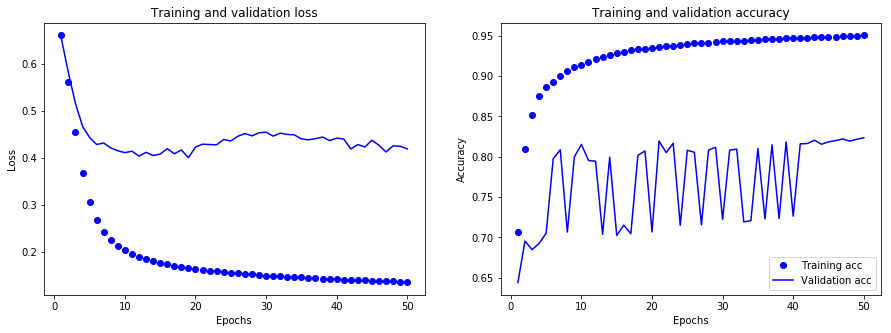

In [78]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss') 
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, acc_values, 'bo', label='Training acc')
ax[1].plot(epochs, val_acc_values, 'b', label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()

# 2

In [80]:
visible = Input(shape=(MAX_WORD_LENGTH * CODE_LEN,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=2**14,
                   validation_data=(x_validate, y_validate))
score = model.evaluate(x_validate, y_validate, batch_size=512)

Train on 400000 samples, validate on 40000 samples
Epoch 1/50
400000/400000 [==============================] - 3s 9us/step - loss: 0.6650 - acc: 0.6972 - val_loss: 0.6562 - val_acc: 0.7204
Epoch 2/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.5893 - acc: 0.8012 - val_loss: 0.6110 - val_acc: 0.7366
Epoch 3/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.5093 - acc: 0.8336 - val_loss: 0.5622 - val_acc: 0.7534
Epoch 4/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.4398 - acc: 0.8513 - val_loss: 0.5186 - val_acc: 0.7604
Epoch 5/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.3843 - acc: 0.8623 - val_loss: 0.4808 - val_acc: 0.7655
Epoch 6/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.3412 - acc: 0.8722 - val_loss: 0.4535 - val_acc: 0.7859
Epoch 7/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.3084 - acc: 0.8797 - val_loss: 0.4349 -

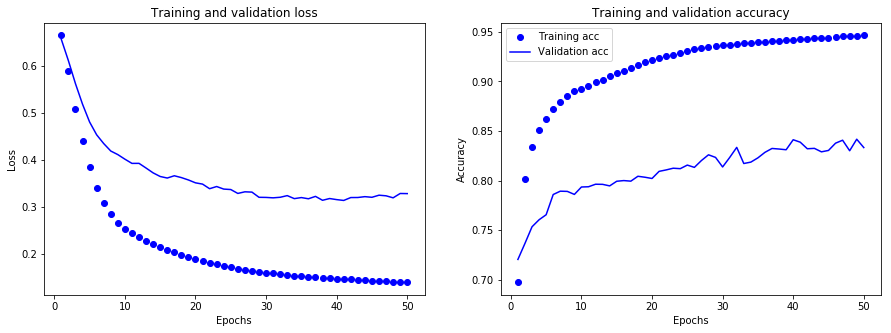

In [81]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss') 
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, acc_values, 'bo', label='Training acc')
ax[1].plot(epochs, val_acc_values, 'b', label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
visible = Input(shape=(MAX_WORD_LENGTH * CODE_LEN,))
hidden1 = Dense(64, activation='relu')(visible)
hidden2 = Dense(32, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
hidden4 = Dense(16, activation='relu')(hidden3)
hidden5 = Dense(8, activation='relu')(hidden4)
hidden6 = Dense(4, activation='relu')(hidden5)
output = Dense(1, activation='sigmoid')(hidden6)
model = Model(inputs=visible, outputs=output)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=2**14,
                   validation_data=(x_validate, y_validate))
score = model.evaluate(x_validate, y_validate, batch_size=512)

Train on 400000 samples, validate on 40000 samples
Epoch 1/50
400000/400000 [==============================] - 4s 11us/step - loss: 0.6156 - acc: 0.7198 - val_loss: 0.5738 - val_acc: 0.7434
Epoch 2/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.4330 - acc: 0.8846 - val_loss: 0.4659 - val_acc: 0.7981
Epoch 3/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.3032 - acc: 0.9144 - val_loss: 0.4320 - val_acc: 0.8101
Epoch 4/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.2232 - acc: 0.9256 - val_loss: 0.3440 - val_acc: 0.8266
Epoch 5/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.1778 - acc: 0.9358 - val_loss: 0.4010 - val_acc: 0.8127
Epoch 6/50
400000/400000 [==============================] - 4s 10us/step - loss: 0.1569 - acc: 0.9405 - val_loss: 0.3068 - val_acc: 0.8370
Epoch 7/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.1380 - acc: 0.9482 - val_loss: 0.3821

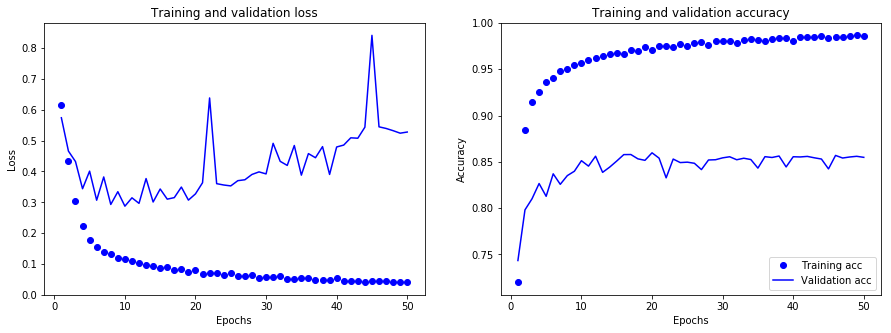

In [89]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss') 
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, acc_values, 'bo', label='Training acc')
ax[1].plot(epochs, val_acc_values, 'b', label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
from keras import backend as K
from keras import optimizers
from keras import regularizers

In [100]:
l2_lambda = 0.01
l1_lambda = 0.001

In [97]:
visible = Input(shape=(MAX_WORD_LENGTH * CODE_LEN,))
hidden1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda))(visible)
hidden2 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda))(hidden1)
hidden3 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda))(hidden2)
hidden4 = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda))(hidden3)
hidden5 = Dense(8, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda))(hidden4)
hidden6 = Dense(4, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda))(hidden5)
output = Dense(1, activation='sigmoid')(hidden6)
model = Model(inputs=visible, outputs=output)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=2**14,
                   validation_data=(x_validate, y_validate))
score = model.evaluate(x_validate, y_validate, batch_size=512)

Train on 400000 samples, validate on 40000 samples
Epoch 1/50
400000/400000 [==============================] - 5s 12us/step - loss: 2.1948 - acc: 0.5915 - val_loss: 1.7367 - val_acc: 0.6315
Epoch 2/50
400000/400000 [==============================] - 4s 9us/step - loss: 1.5049 - acc: 0.7198 - val_loss: 1.3388 - val_acc: 0.6421
Epoch 3/50
400000/400000 [==============================] - 4s 9us/step - loss: 1.1947 - acc: 0.7606 - val_loss: 1.1486 - val_acc: 0.7239
Epoch 4/50
400000/400000 [==============================] - 4s 9us/step - loss: 1.0274 - acc: 0.7942 - val_loss: 1.0432 - val_acc: 0.7214
Epoch 5/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.9163 - acc: 0.8194 - val_loss: 0.9602 - val_acc: 0.7346
Epoch 6/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.8338 - acc: 0.8335 - val_loss: 0.8979 - val_acc: 0.7303
Epoch 7/50
400000/400000 [==============================] - 4s 10us/step - loss: 0.7709 - acc: 0.8430 - val_loss: 0.8441

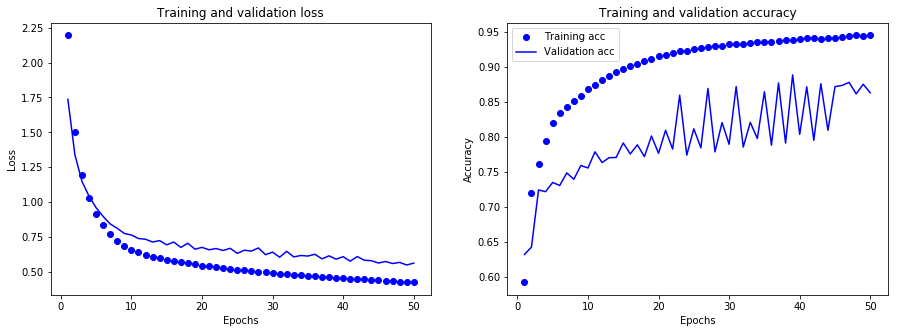

In [98]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss') 
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, acc_values, 'bo', label='Training acc')
ax[1].plot(epochs, val_acc_values, 'b', label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()

In [168]:
from keras.layers import Dense, Input
from keras.models import Model

In [175]:
inputs = Input(shape=(MAX_WORD_LENGTH * CODE_LEN,))
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs, output)
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=2**6, validation_data=(x_validate, y_validate))
score = model.evaluate(x_validate, y_validate, batch_size=2**6)

Train on 400000 samples, validate on 40000 samples
Epoch 1/10
400000/400000 [==============================] - 28s 69us/step - loss: 0.1954 - acc: 0.7213 - val_loss: 0.1223 - val_acc: 0.8401
Epoch 2/10
400000/400000 [==============================] - 26s 64us/step - loss: 0.0508 - acc: 0.9348 - val_loss: 0.0947 - val_acc: 0.8549
Epoch 3/10
400000/400000 [==============================] - 24s 61us/step - loss: 0.0300 - acc: 0.9632 - val_loss: 0.0816 - val_acc: 0.8900
Epoch 4/10
400000/400000 [==============================] - 25s 63us/step - loss: 0.0227 - acc: 0.9726 - val_loss: 0.0867 - val_acc: 0.8790
Epoch 5/10
400000/400000 [==============================] - 23s 57us/step - loss: 0.0186 - acc: 0.9776 - val_loss: 0.0912 - val_acc: 0.8790
Epoch 6/10
400000/400000 [==============================] - 23s 57us/step - loss: 0.0156 - acc: 0.9816 - val_loss: 0.0859 - val_acc: 0.8831
Epoch 7/10
400000/400000 [==============================] - 23s 57us/step - loss: 0.0137 - acc: 0.9843 - val_

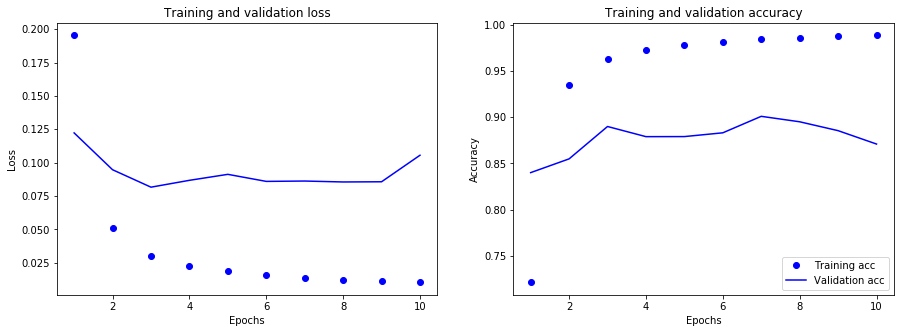

In [181]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']

epochs = range(1, 11)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss') 
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, acc_values, 'bo', label='Training acc')
ax[1].plot(epochs, val_acc_values, 'b', label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()